In [5]:
## Standard libraries
import os
import numpy as np
import random
import math


## Imports for plotting
import matplotlib.pyplot as plt
plt.set_cmap('cividis')
%matplotlib inline
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2.0

import torch

## Torchvision
import torchvision
from torchvision.datasets import CIFAR10
from torchvision import transforms


<Figure size 640x480 with 0 Axes>

In [6]:
def img_to_patch(x, patch_size, flatten_channels=True):
    """
    Inputs:
        x - torch.Tensor representing the image of shape [B, C, H, W]
        patch_size - Number of pixels per dimension of the patches (integer)
        flatten_channels - If True, the patches will be returned in a flattened format
                           as a feature vector instead of a image grid.
    """
    B, C, H, W = x.shape
    x = x.reshape(B, C, H//patch_size, patch_size, W//patch_size, patch_size)
    x = x.permute(0, 2, 4, 1, 3, 5) # [B, H', W', C, p_H, p_W]
    x = x.flatten(1,2)              # [B, H'*W', C, p_H, p_W]
    if flatten_channels:
        x = x.flatten(2,4)          # [B, H'*W', C*p_H*p_W]
    return x

Files already downloaded and verified


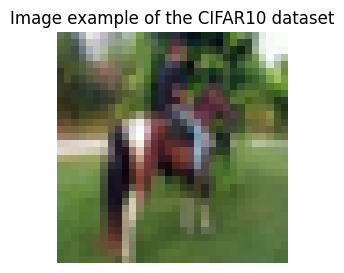

In [7]:
DATASET_PATH = 'data'

test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize([0.49139968, 0.48215841, 0.44653091], 
                                                          [0.24703223, 0.24348513, 0.26158784])
                                     ])

val_dataset = CIFAR10(root=DATASET_PATH, train=True, transform=test_transform, download=True)
_, val_set = torch.utils.data.random_split(val_dataset, [45000, 5000])


# Visualize some examples
NUM_IMAGES = 1
CIFAR_images = torch.stack([val_set[idx][0] for idx in range(NUM_IMAGES)], dim=0)
img_grid = torchvision.utils.make_grid(CIFAR_images, nrow=4, normalize=True, pad_value=0.9)
img_grid = img_grid.permute(1, 2, 0)

plt.figure(figsize=(3,3))
plt.title("Image example of the CIFAR10 dataset")
plt.imshow(img_grid)
plt.axis('off')
plt.show()
plt.close()




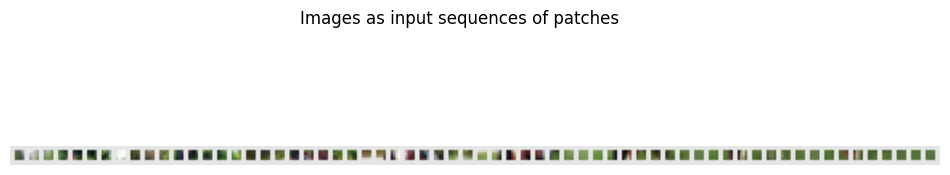

In [8]:
img_patches = img_to_patch(CIFAR_images, patch_size=4, flatten_channels=False)

fig, ax = plt.subplots(1, 1, figsize=(12,3))
fig.suptitle("Images as input sequences of patches")
for i in range(1):
    img_grid = torchvision.utils.make_grid(img_patches[i], nrow=64, normalize=True, pad_value=0.9)
    img_grid = img_grid.permute(1, 2, 0)
    ax.imshow(img_grid)
    ax.axis('off')
plt.show()
plt.close()